<a href="https://colab.research.google.com/github/zcapkkk/chickenbork/blob/master/12C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Numpy
import numpy as np

# Importing Matplotlib
import matplotlib.pyplot as plt


# Importing Pandas
import pandas as pd

# Importing Scipy Constants
import scipy.constants as spc

def photon(w,T):
    '''returns photon probability based on frequency and temperature'''
    return (1/(np.exp(spc.value('second radiation constant')*100*w/T))-1))

#write a function which given the n ID returns the energy level 

def energy(a):
  'takes ID, returns energy'
  return np.array(trans.loc[trans["n1"]==a]["n1energy"])[0]



# import csv

trans = pd.read_csv('https://raw.githubusercontent.com/zcapkkk/myexomol/master/12C2__MoLLIST.trans.csv')
states = pd.read_csv('https://raw.githubusercontent.com/zcapkkk/myexomol/master/12C2__MoLLIST.states.csv')


2911 4653
1 2910


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


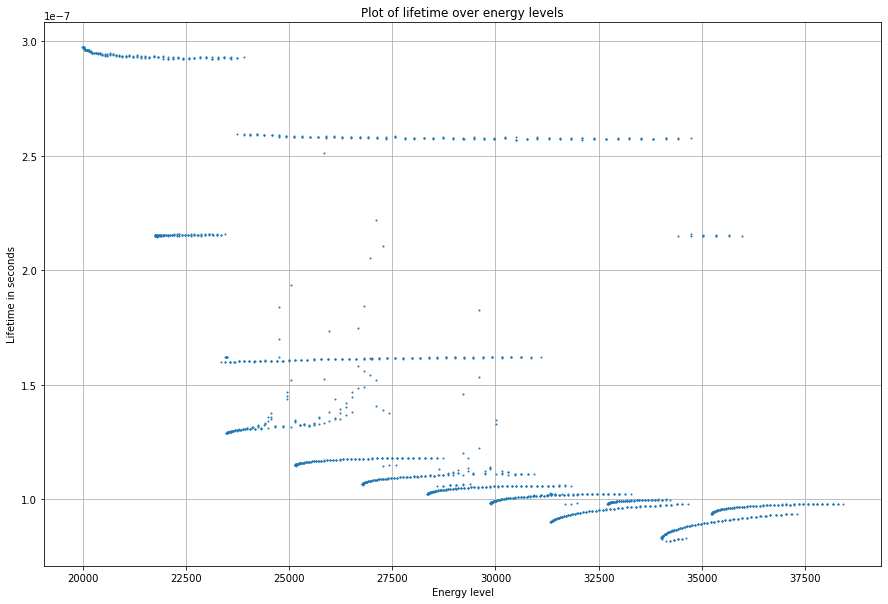

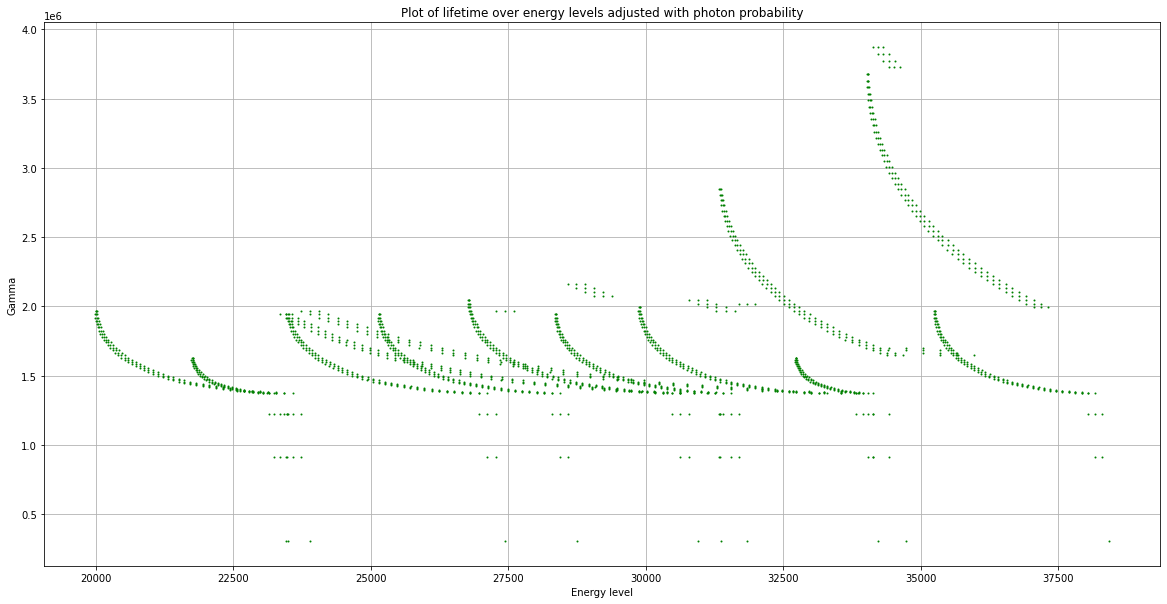

In [2]:
# create the new energy colummns

trans["n1energy"]=0
trans["n2energy"]=0

# fill the columns

for i in range(len(trans)):
  trans.iloc[i, trans.columns.get_loc("n1energy")]=states.loc[states["ID"]==trans.loc[i,"n1"]]["Level"].values[0]

for i in range(len(trans)):
  trans.iloc[i, trans.columns.get_loc("n2energy")]=states.loc[states["ID"]==trans.loc[i,"n2"]]["Level"].values[0]

# determine max and min of the energy levels

n1min=int(trans.min(axis=0)["n1"])
n1max=int(trans.max(axis=0)["n1"])

print(n1min,n1max)

n2min=int(trans.min(axis=0)["n2"])
n2max=int(trans.max(axis=0)["n2"])

print(n2min,n2max)

# summation for emission



x = np.arange(n1min,n1max+1,1)
y1 = np.array([])

for i in range(n1min,n1max+1,1):
    y1 = np.append(trans.loc[trans["n1"]==i].sum()[2],y1)

for i in range(len(x)):
    x[i] = energy(x[i])


# Plotting the results
plt.figure(figsize=(15,10))
plt.plot(x,1/y1,'.',markersize=2)
plt.ylabel("Lifetime in seconds")
plt.xlabel("Energy level")
plt.title("Plot of lifetime over energy levels")
plt.grid(True)

# create new column planck

Planck = pd.Series([])
for i in range(len(trans)):
    Planck[i]=photon(trans["energy"][i],275)
    
trans.insert((len(trans.columns)),"Planck",Planck)
trans.insert((len(trans.columns)),"product",trans["ai"]*trans["Planck"])

# Time for the real thing


y=pd.Series([])

for i in range(n1min,n1max+1,1):
    y=np.append(trans.loc[trans["n1"]==i].sum()[5]+
    trans.loc[trans["n1"]==i].sum()[5]+
    trans.loc[trans["n2"]==i].sum()[2],y)

    
    
# Plotting the results
plt.figure(figsize=(20,10))
plt.plot(x,y,'.',markersize=2,color="green")
plt.ylabel("Gamma")
plt.xlabel("Energy level")
plt.title("Plot of lifetime over energy levels adjusted with photon probability")
plt.grid(True)   

In [3]:
trans

,n1,n2,ai,energy,n1energy,n2energy,Planck,product
0,2959,2673,2.660000e-08,5566.3651,20463.92116,14897.5561,6.467976e+09,172.048149
1,2953,2667,3.330000e-08,5566.4103,20355.59749,14789.1877,6.467920e+09,215.381730
2,2956,2670,1.240000e-07,5566.8240,20408.09641,14841.2719,6.467437e+09,801.962165
3,2962,2676,1.040000e-07,5567.8356,20523.36794,14955.5325,6.466267e+09,672.491746
4,2950,2664,1.510000e-07,5567.8870,20306.63900,14738.7511,6.466202e+09,976.396472
...,...,...,...,...,...,...,...,...
155105,4578,58,6.410000e-15,34740.3969,35967.73124,1227.3379,1.036347e+09,0.000007
155106,4590,70,4.320000e-15,34740.8089,36246.83755,1506.0261,1.036334e+09,0.000004
155107,4581,61,1.380000e-14,34741.0856,36033.34747,1292.2680,1.036326e+09,0.000014
155108,4587,67,1.150000e-14,34741.3450,36173.00357,1431.6548,1.036318e+09,0.000012


In [4]:
# create new column planck2

Planck2 = pd.Series([])
for i in range(len(trans)):
    Planck2[i]=photon(trans["energy"][i],15)
    
trans.insert((len(trans.columns)),"Planck2",Planck2)
trans.insert((len(trans.columns)),"product2",trans["ai"]*trans["Planck2"])

# create new column planck3

Planck3 = pd.Series([])
for i in range(len(trans)):
    Planck3[i]=photon(trans["energy"][i],1115)
    
trans.insert((len(trans.columns)),"Planck3",Planck3)
trans.insert((len(trans.columns)),"product3",trans["ai"]*trans["Planck3"])

trans

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


,n1,n2,ai,energy,n1energy,n2energy,Planck,product,Planck2,product2,Planck3,product3
0,2959,2673,2.660000e-08,5566.3651,20463.92116,14897.5561,6.467976e+09,172.048149,3.527985e+08,9.384440e+00,2.622473e+10,697.577899
1,2953,2667,3.330000e-08,5566.4103,20355.59749,14789.1877,6.467920e+09,215.381730,3.527956e+08,1.174809e+01,2.622443e+10,873.273440
2,2956,2670,1.240000e-07,5566.8240,20408.09641,14841.2719,6.467437e+09,801.962165,3.527694e+08,4.374340e+01,2.622260e+10,3251.601815
3,2962,2676,1.040000e-07,5567.8356,20523.36794,14955.5325,6.466267e+09,672.491746,3.527053e+08,3.668135e+01,2.621771e+10,2726.641874
4,2950,2664,1.510000e-07,5567.8870,20306.63900,14738.7511,6.466202e+09,976.396472,3.527020e+08,5.325801e+01,2.621756e+10,3958.851213
...,...,...,...,...,...,...,...,...,...,...,...,...
155105,4578,58,6.410000e-15,34740.3969,35967.73124,1227.3379,1.036347e+09,0.000007,5.652800e+07,3.623445e-07,4.201915e+09,0.000027
155106,4590,70,4.320000e-15,34740.8089,36246.83755,1506.0261,1.036334e+09,0.000004,5.652733e+07,2.441981e-07,4.201864e+09,0.000018
155107,4581,61,1.380000e-14,34741.0856,36033.34747,1292.2680,1.036326e+09,0.000014,5.652688e+07,7.800709e-07,4.201832e+09,0.000058
155108,4587,67,1.150000e-14,34741.3450,36173.00357,1431.6548,1.036318e+09,0.000012,5.652645e+07,6.500542e-07,4.201801e+09,0.000048


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


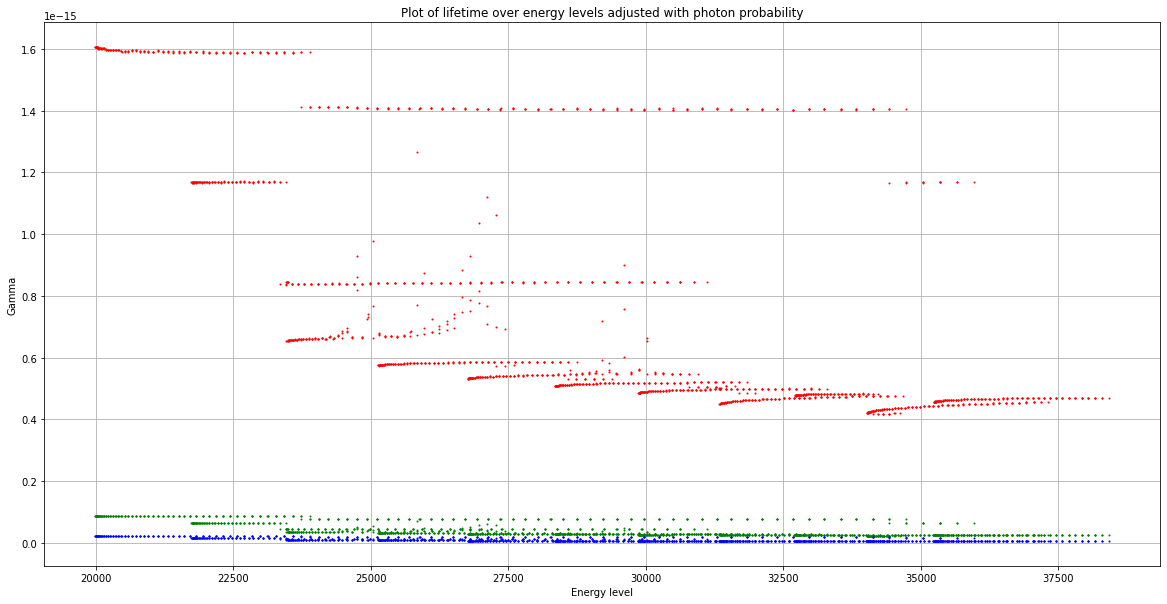

In [5]:
# Time for the real thing


# Planck
y=pd.Series([])

for i in range(n1min,n1max+1,1):
    y=np.append(trans.loc[trans["n1"]==i].sum()["product"]+
    trans.loc[trans["n1"]==i].sum()["product"]+
    trans.loc[trans["n2"]==i].sum()["ai"],y)

# Planck 2


y2=pd.Series([])

for i in range(n1min, n1max+1,1):
  y2=np.append(trans.loc[trans["n1"]==i].sum()["product2"]+
              trans.loc[trans["n1"]==i].sum()["product2"]+
              trans.loc[trans["n2"]==i].sum()["ai"],y2)

# Planck 3

y3=pd.Series([])

for i in range(n1min, n1max+1,1):
  y3=np.append(trans.loc[trans["n1"]==i].sum()["product3"]+
              trans.loc[trans["n1"]==i].sum()["product3"]+
              trans.loc[trans["n2"]==i].sum()["ai"],y3)

  
    
# Plotting the results
plt.figure(figsize=(20,10))
plt.plot(x,1/y,'.',markersize=2,color="green")
plt.plot(x,1/y2,'.',markersize=2,color="red") #T=15
plt.plot(x,1/y3,'.',markersize=2,color="blue") #T=1115
plt.ylabel("Gamma")
plt.xlabel("Energy level")
plt.title("Plot of lifetime over energy levels adjusted with photon probability")
plt.grid(True)   

In [0]:
trans.to_excel('12C2trans.xlsx')